In [ ]:
import nannyml as nml
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

reference_df = nml.load_synthetic_car_loan_dataset()[0]
analysis_df = nml.load_synthetic_car_loan_dataset()[1]

display(reference_df.head(3))

,car_value,salary_range,debt_to_income_ratio,loan_length,repaid_loan_on_prev_car,size_of_downpayment,driver_tenure,repaid,timestamp,y_pred_proba,y_pred
0,39811.0,40K - 60K €,0.632950,19.0,False,40%,0.212653,1.0,2018-01-01 00:00:00.000,0.99,1
1,12679.0,40K - 60K €,0.718627,7.0,True,10%,4.927549,0.0,2018-01-01 00:08:43.152,0.07,0
2,19847.0,40K - 60K €,0.721724,17.0,False,0%,0.520817,1.0,2018-01-01 00:17:26.304,1.00,1


In [ ]:
print(reference_df.head(3).to_markdown(tablefmt="grid"))

+----+-------------+----------------+------------------------+---------------+---------------------------+-----------------------+-----------------+----------+-------------------------+----------------+----------+
|    |   car_value | salary_range   |   debt_to_income_ratio |   loan_length | repaid_loan_on_prev_car   | size_of_downpayment   |   driver_tenure |   repaid | timestamp               |   y_pred_proba |   y_pred |
+====+=============+================+========================+===============+===========================+=======================+=================+==========+=========================+================+==========+
|  0 |       39811 | 40K - 60K €    |               0.63295  |            19 | False                     | 40%                   |        0.212653 |        1 | 2018-01-01 00:00:00.000 |           0.99 |        1 |
+----+-------------+----------------+------------------------+---------------+---------------------------+-----------------------+--------------

In [ ]:
estimator = nml.CBPE(
    y_pred_proba='y_pred_proba',
    y_pred='y_pred',
    y_true='repaid',
    metrics=['confusion_matrix'],
    problem_type='classification_binary',
    normalize_confusion_matrix="all",
)

In [ ]:
estimator.fit(reference_df)

In [ ]:
results = estimator.estimate(analysis_df)

results_data = results.to_df()
display(results_data)

chunk                                                        \
              key chunk_index start_index end_index start_date end_date   
0        [0:4999]           0           0      4999       None     None   
1     [5000:9999]           1        5000      9999       None     None   
2   [10000:14999]           2       10000     14999       None     None   
3   [15000:19999]           3       15000     19999       None     None   
4   [20000:24999]           4       20000     24999       None     None   
5   [25000:29999]           5       25000     29999       None     None   
6   [30000:34999]           6       30000     34999       None     None   
7   [35000:39999]           7       35000     39999       None     None   
8   [40000:44999]           8       40000     44999       None     None   
9   [45000:49999]           9       45000     49999       None     None   
10       [0:4999]           0           0      4999       None     None   
11    [5000:9999]           1        5000      9999       None     None   
12  [10000:14999]           2       10000     14999       None     None   
13  [15000:19999]           3       15000     19999       None     None   
14  [20000:24999]           4       20000     24999       None     None   
15  [25000:29999]           5       25000     29999       None     None   
16  [30000:34999]           6       30000     34999       None     None   
17  [35000:39999]           7       35000     39999       None     None   
18  [40000:44999]           8       40000     44999       None     None   
19  [45000:49999]           9       45000     49999       None     None   

              true_positive                          ...  false_positive  \
       period         value sampling_error realized  ... lower_threshold   
0   reference      0.458185       0.007053   0.4596  ...        0.016022   
1   reference      0.456855       0.007053   0.4550  ...        0.016022   
2   reference      0.469963       0.007053   0.4710  ...        0.016022   
3   reference      0.462260       0.007053   0.4634  ...        0.016022   
4   reference      0.468431       0.007053   0.4674  ...        0.016022   
5   reference      0.459727       0.007053   0.4580  ...        0.016022   
6   reference      0.465254       0.007053   0.4648  ...        0.016022   
7   reference      0.469571       0.007053   0.4690  ...        0.016022   
8   reference      0.465682       0.007053   0.4682  ...        0.016022   
9   reference      0.466762       0.007053   0.4650  ...        0.016022   
10   analysis      0.481766       0.007053      NaN  ...        0.016022   
11   analysis      0.454646       0.007053      NaN  ...        0.016022   
12   analysis      0.455756       0.007053      NaN  ...        0.016022   
13   analysis      0.457828       0.007053      NaN  ...        0.016022   
14   analysis      0.468372       0.007053      NaN  ...        0.016022   
15   analysis      0.461246       0.007053      NaN  ...        0.016022   
16   analysis      0.459067       0.007053      NaN  ...        0.016022   
17   analysis      0.458246       0.007053      NaN  ...        0.016022   
18   analysis      0.453561       0.007053      NaN  ...        0.016022   
19   analysis      0.473578       0.007053      NaN  ...        0.016022   

          false_negative                                                    \
    alert          value sampling_error realized upper_confidence_boundary   
0   False       0.035017       0.002615   0.0348                  0.042861   
1   False       0.036722       0.002615   0.0380                  0.044566   
2   False       0.035754       0.002615   0.0340                  0.043598   
3   False       0.035246       0.002615   0.0362                  0.043090   
4   False       0.035472       0.002615   0.0398                  0.043316   
5   False       0.035011       0.002615   0.0332                  0.042856   
6   False       0.038345       0.002615   0.0344                

In [ ]:
from docs.utils import print_multi_index_markdown
print_multi_index_markdown(results_data)

+----+---------------+-----------------+-----------------+---------------+----------------+--------------+------------+-------------------+--------------------+--------------+-------------------------------+-------------------------------+---------------------+---------------------+-----------+-------------------+--------------------+--------------+-------------------------------+-------------------------------+---------------------+---------------------+-----------+--------------------+--------------------+--------------+-------------------------------+-------------------------------+---------------------+---------------------+-----------+--------------------+--------------------+--------------+-------------------------------+-------------------------------+---------------------+---------------------+-----------+
|    | | chunk       |                 |                 |               |                |              |            | | true_positive   |                    |              

In [ ]:
true_pos_rate = results_data['true_positive']['value'].values
false_pos_rate = results_data['false_positive']['value'].values
true_neg_rate = results_data['true_negative']['value'].values
false_neg_rate = results_data['false_negative']['value'].values

In [ ]:
sensitivity = true_pos_rate / (true_pos_rate + false_neg_rate)
specificity = true_neg_rate / (true_neg_rate + false_pos_rate)

balanced_accuracy = (sensitivity + specificity) / 2

In [ ]:
num_ref_chunks = len(results.filter(period = 'reference').to_df())

reference_index = np.arange(num_ref_chunks)
analysis_index = np.arange(num_ref_chunks, len(results_data))

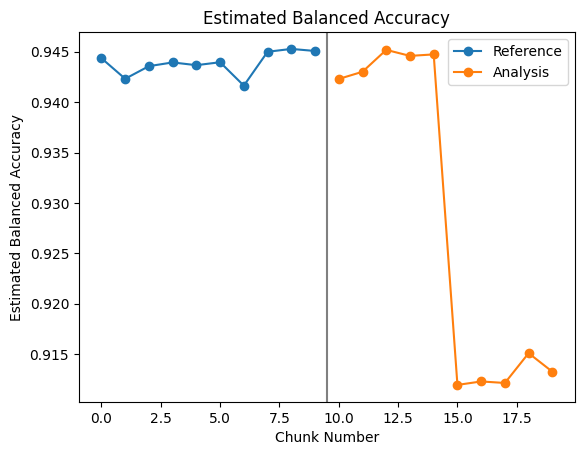

In [ ]:
plt.plot(reference_index, balanced_accuracy[:num_ref_chunks], label='Reference', marker='o')
plt.plot(analysis_index, balanced_accuracy[num_ref_chunks:], label='Analysis', marker='o')

plt.axvline(x=num_ref_chunks-0.5, color='gray')

plt.xlabel('Chunk Number')
plt.ylabel('Estimated Balanced Accuracy')
plt.title('Estimated Balanced Accuracy')

plt.legend()

plt.show()

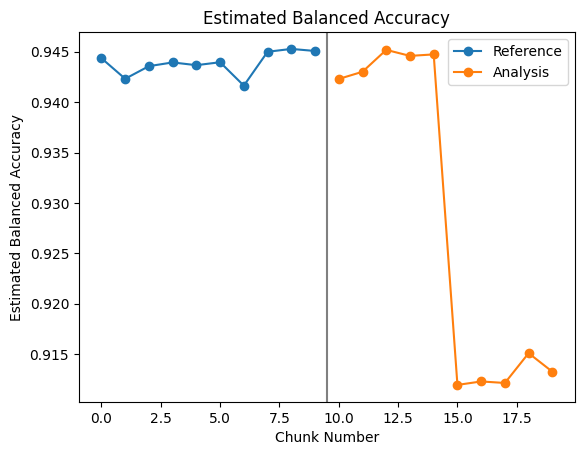

In [ ]:
plt.plot(reference_index, balanced_accuracy[:num_ref_chunks], label='Reference', marker='o')
plt.plot(analysis_index, balanced_accuracy[num_ref_chunks:], label='Analysis', marker='o')

plt.axvline(x=num_ref_chunks-0.5, color='gray')

plt.xlabel('Chunk Number')
plt.ylabel('Estimated Balanced Accuracy')
plt.title('Estimated Balanced Accuracy')

plt.legend()
plt.savefig("../_static/tutorials/performance_estimation/binary/tutorial-custom-metric-estimation-binary-car-loan-analysis-with-ref.svg")